#### Importando Bibliotecas

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.plotting.backend = "plotly"

### Importando base de dados

In [16]:
df = pd.read_excel("teste.xlsx", usecols="A:C", header=0) # header transforma linhas em cabeçalho
df

,Data,Nome,Acoes
0,2024-01-01 00:00:00,Ana,5.0
1,2024-01-16 00:00:00,Caio,8.0
2,2024-01-31 00:00:00,Mariana,6.0
3,2024-02-15 00:00:00,Pedro,10.0
4,2024-03-01 00:00:00,Sofia,7.0
...,...,...,...
70,2026-11-16 00:00:00,Ana,40.0
71,2026-12-01 00:00:00,Caio,45.0
72,2026-12-16 00:00:00,Mariana,46.0
73,2026-12-31 00:00:00,Pedro,48.0


#### Tratando Dados

In [17]:
copiadf = df.copy()
copiadf = copiadf.reset_index()
copiadf = copiadf.reset_index(drop=True)
copiadf = copiadf.replace(r'^\s*$', pd.NA, regex=True).dropna(how="any")
copiadf


,index,Data,Nome,Acoes
0,0,2024-01-01 00:00:00,Ana,5.0
1,1,2024-01-16 00:00:00,Caio,8.0
2,2,2024-01-31 00:00:00,Mariana,6.0
3,3,2024-02-15 00:00:00,Pedro,10.0
4,4,2024-03-01 00:00:00,Sofia,7.0
...,...,...,...,...
69,69,2026-11-01 00:00:00,Sofia,44.0
70,70,2026-11-16 00:00:00,Ana,40.0
71,71,2026-12-01 00:00:00,Caio,45.0
72,72,2026-12-16 00:00:00,Mariana,46.0


## Gráfico de Barras

In [ ]:
import plotly.express as px

copiadf["Acoes"] = copiadf["Acoes"].astype(int)
copiadf["Data"] = pd.to_datetime(copiadf["Data"], format="%d/%m/%Y")

for nome, grupo in copiadf.groupby("Nome"):
    fig = px.bar(
        grupo.sort_values("Data"),  
        x="Data",
        y="Acoes",
        title=f"Registro de Ações a cada 15 dias de {nome}",
        labels={"Acoes": "Quantidade de Ações", "Data": "Data"},
        color="Acoes",
        color_continuous_scale="Inferno"
    )
    fig.update_layout(
        xaxis_title="Data",
        yaxis_title="Quantidade de Ações",
        xaxis=dict(tickangle=-45, type="date")
    )
    
    fig.show()




## Gráficos de Linhas

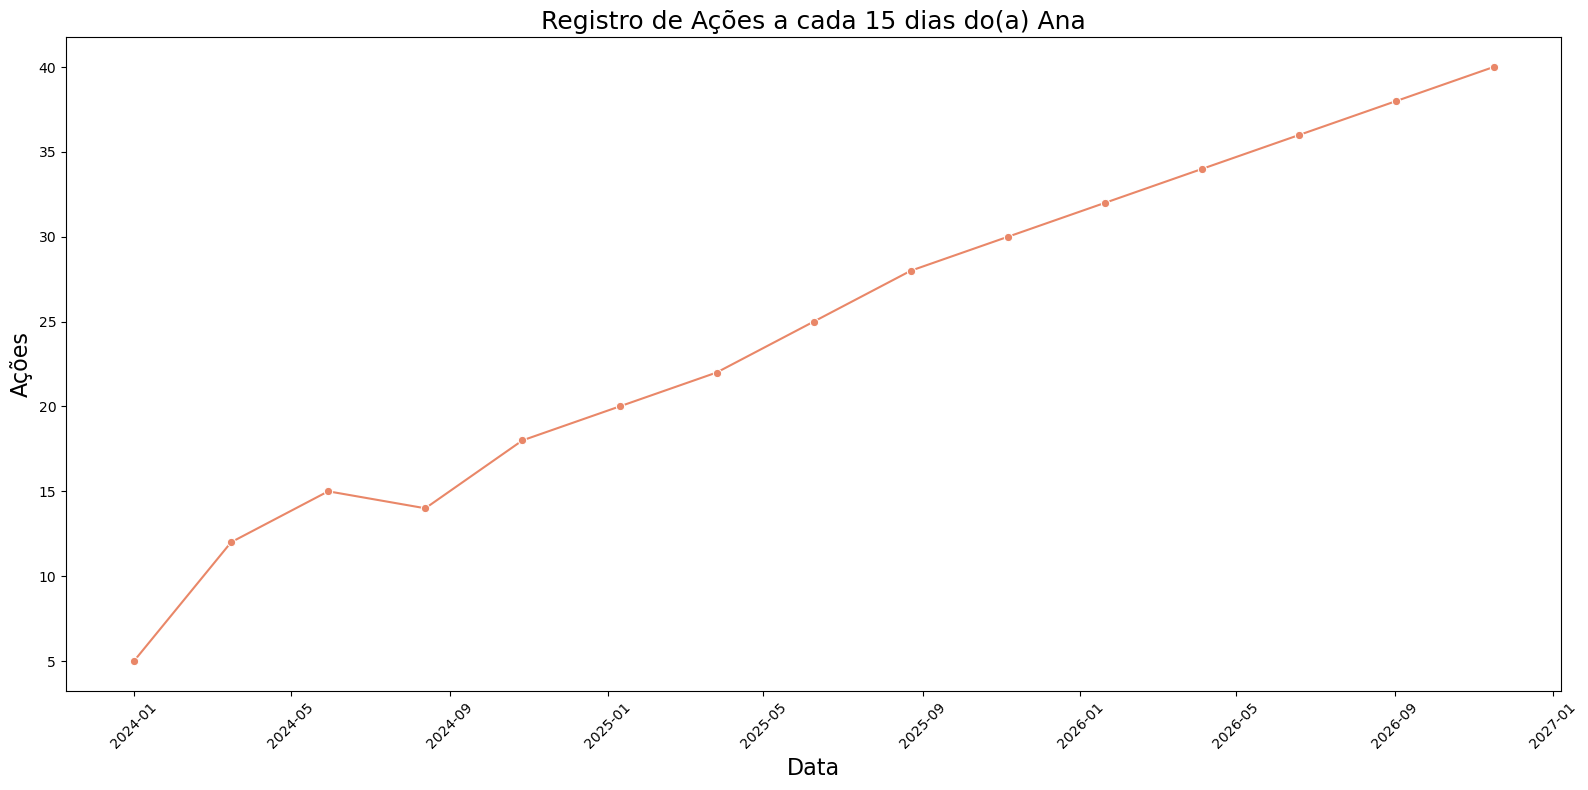

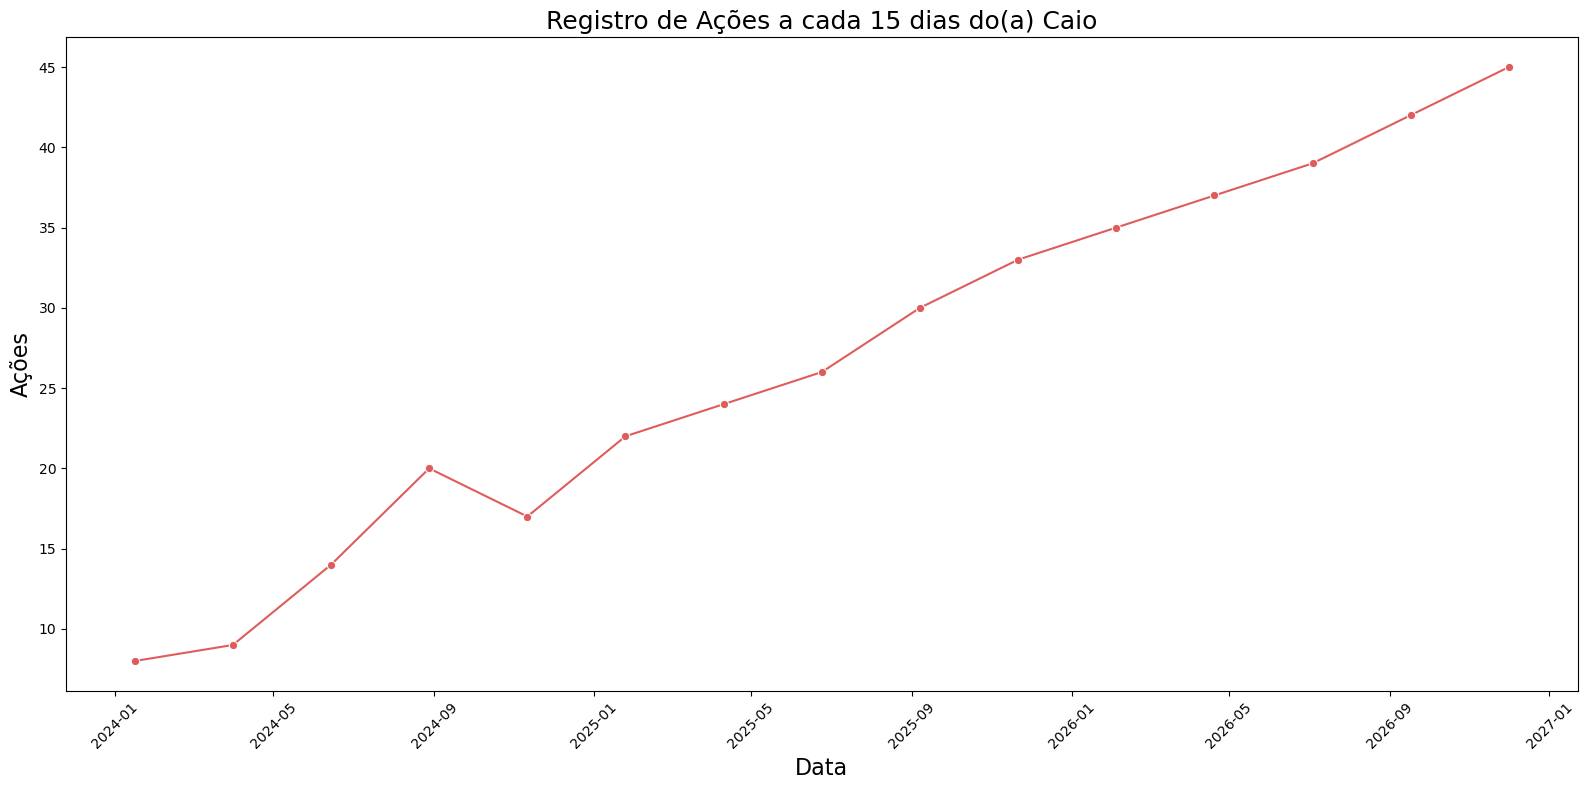

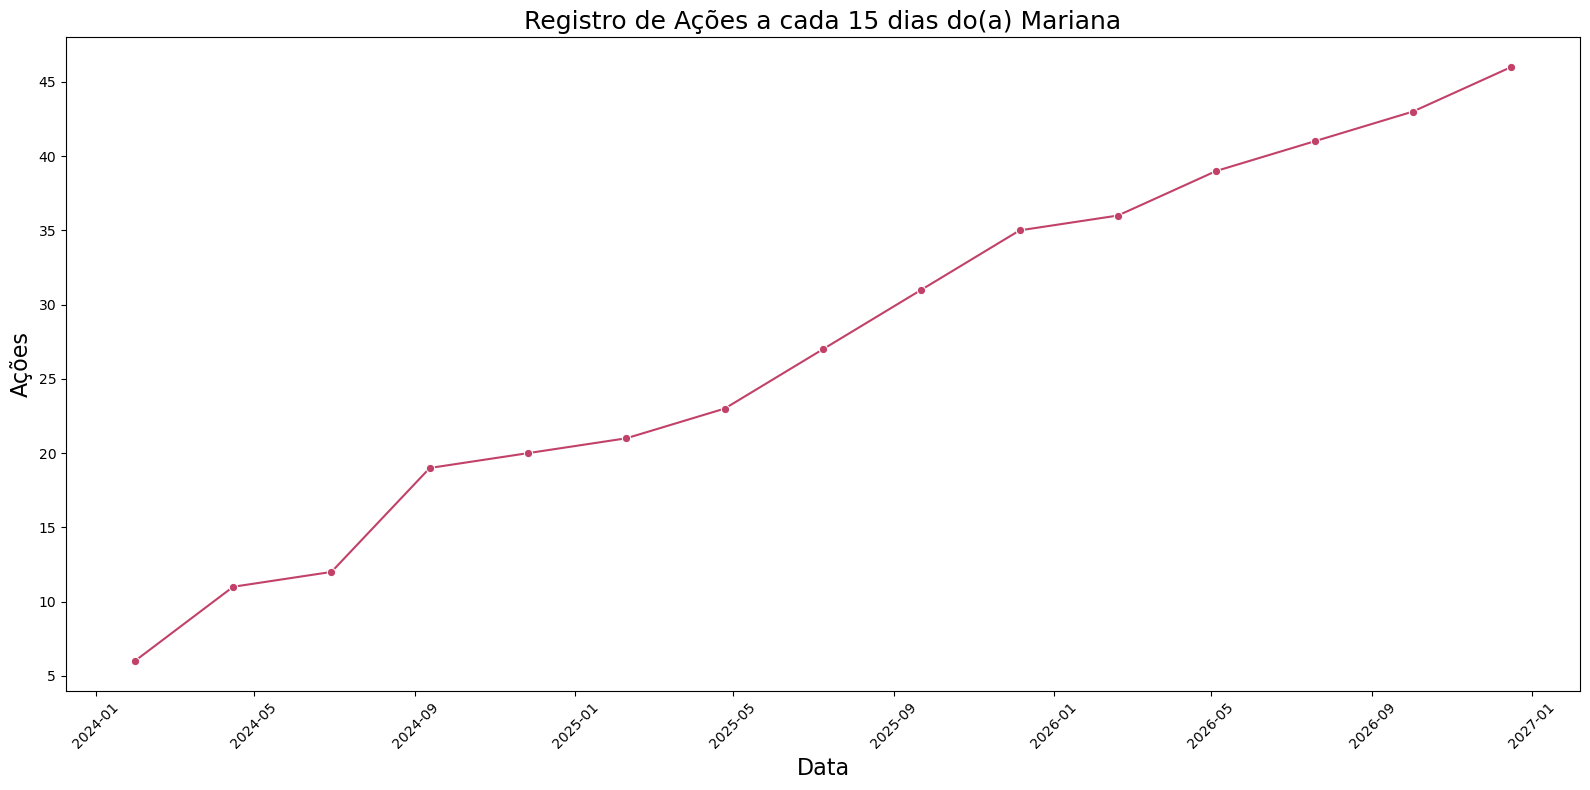

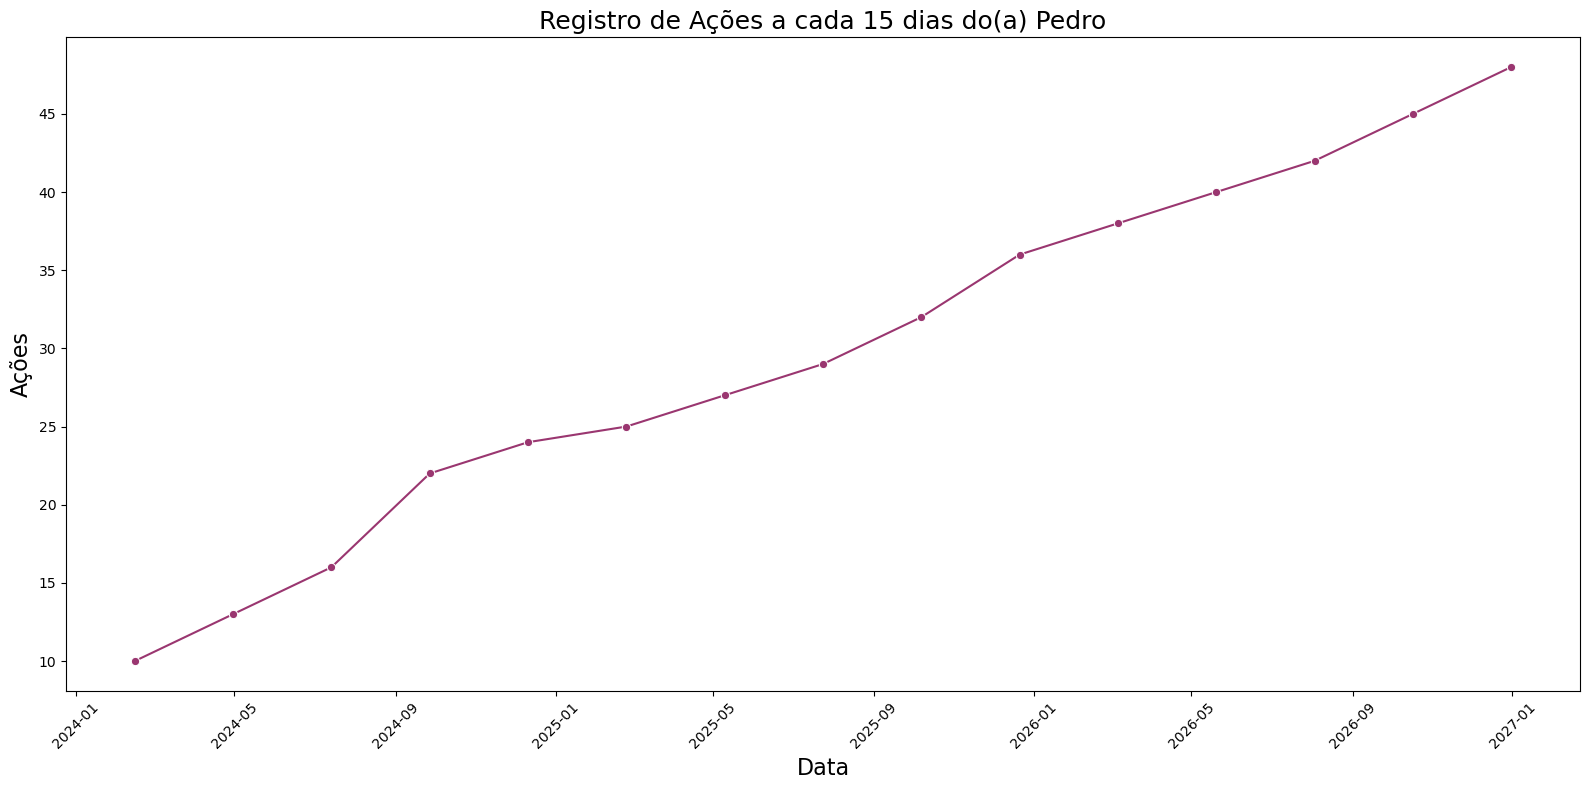

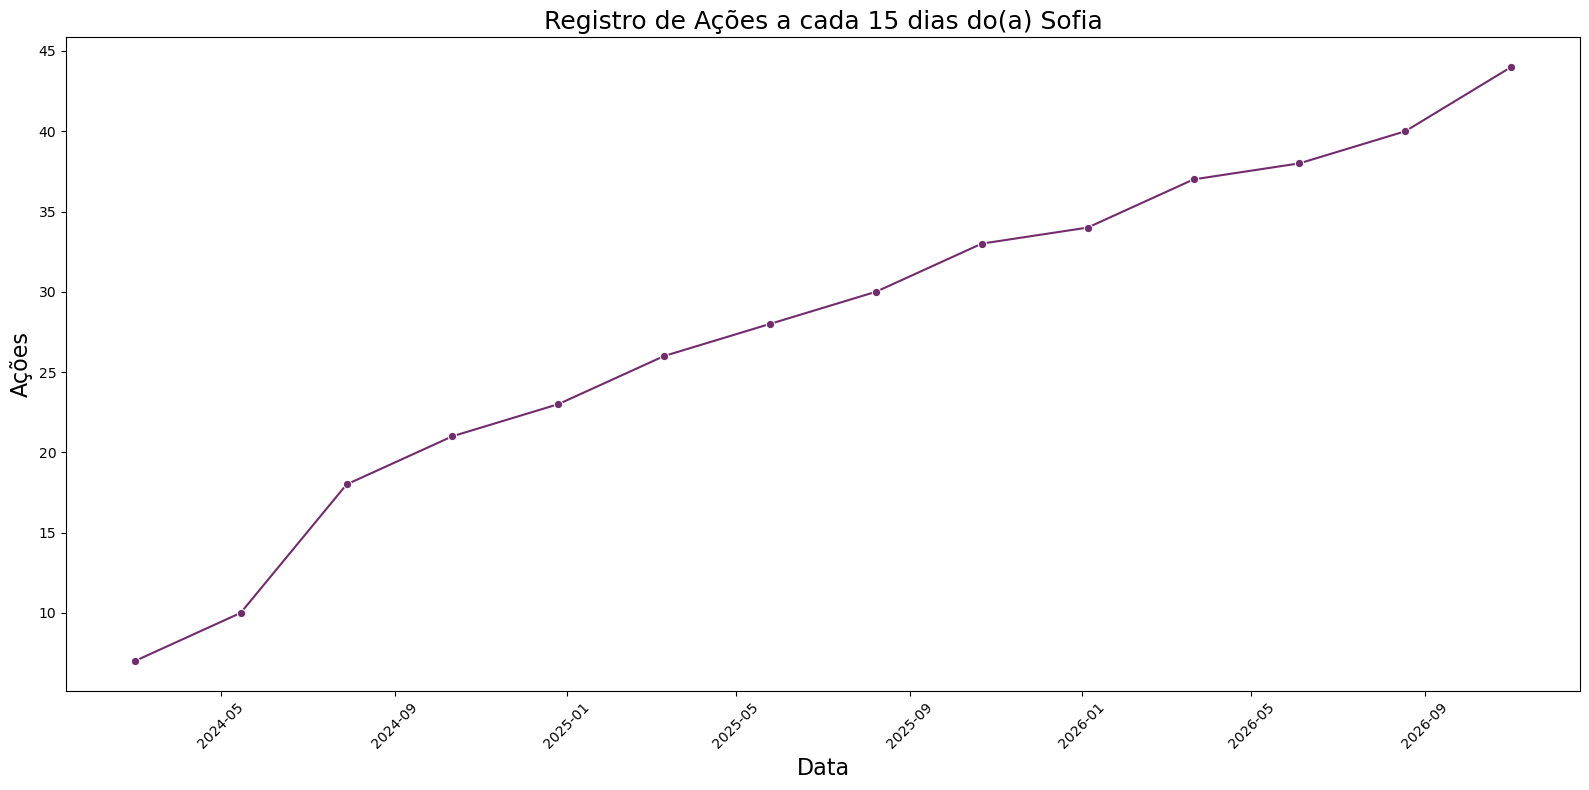

In [19]:
palette = sns.color_palette("flare", n_colors=len(copiadf["Nome"].unique()))
for i, (nome, grupo) in enumerate(copiadf.groupby("Nome")):
    plt.figure(figsize=(16,8))
    sns.lineplot(x="Data", y="Acoes", data=grupo, marker="o", color=palette[i])
    plt.title(f"Registro de Ações a cada 15 dias do(a) {nome}", fontsize=18)
    plt.xlabel("Data", fontsize=16)
    plt.ylabel("Ações", fontsize=16)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()